# This is a heart disease prediction project
we are going to predict based on the data whether someone has heart disease or not

1. Problem Definition
2. Data
3. Evaluation
4. Feature
5. Modeling
6. Experimentation

# 1. Problem Definition
> Based on the given data we need to predict if a patient has heart disease or not

# 2. Data
> we have the data and have load it

# 3. Evaluation
> In the initial stage we need to make sure, if our model gives us an accuracy of 95%

# 4. Feature
> what features are import, what features columns means what
age
age in years

sex
(1 = male; 0 = female)

cp
chest pain type

trestbps
resting blood pressure (in mm Hg on admission to the hospital)

chol
serum cholestoral in mg/dl

fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg
resting electrocardiographic results

thalach
maximum heart rate achieved

exang
exercise induced angina (1 = yes; 0 = no)

oldpeak
ST depression induced by exercise relative to rest

# Tools Preparation

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
# from sklearn.metrics import plot_roc_curve

# Exploring the Data Initial Stage
1. what problem i am going to solve
2. what kind of data i have
3. does this data have missing values
4. are there any outliers, sporious vectors
5. can we add or remove some of the feature

In [120]:
df = pd.read_csv("heart.csv")
df.shape

(1025, 14)

In [121]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [122]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [123]:
# to know about in "target" column that how much 0 and 1 it contain
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

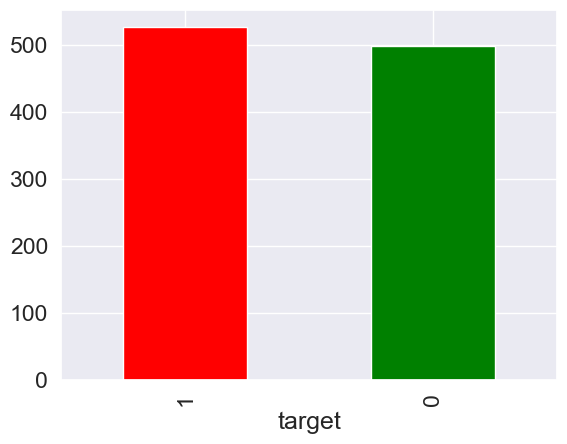

In [124]:
# for better result plot it
df["target"].value_counts().plot(kind="bar", color=["red","green"])  
# red (1) denotes that the patient have heart disease and green(0) for healthy person

In [125]:
# to know if are there any missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [126]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [127]:
df["sex"].value_counts()  # 1 for male and 0 for female

sex
1    713
0    312
Name: count, dtype: int64

In [128]:
# compare two columns "sex" and "target"
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

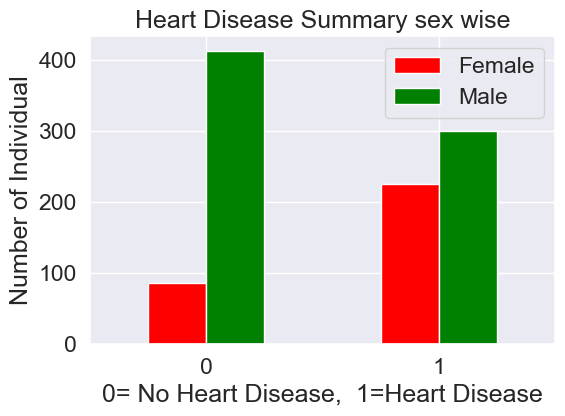

In [129]:
# now to plot it
pd.crosstab(df.target,df.sex).plot(kind="bar",           #crosstab is used for only two columns
                                   figsize=(6,4),
                                   color=["red","green"])
plt.title("Heart Disease Summary sex wise")
plt.xlabel("0= No Heart Disease,  1=Heart Disease")
plt.ylabel("Number of Individual")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

### relationship between "age" and "heart rate" columns

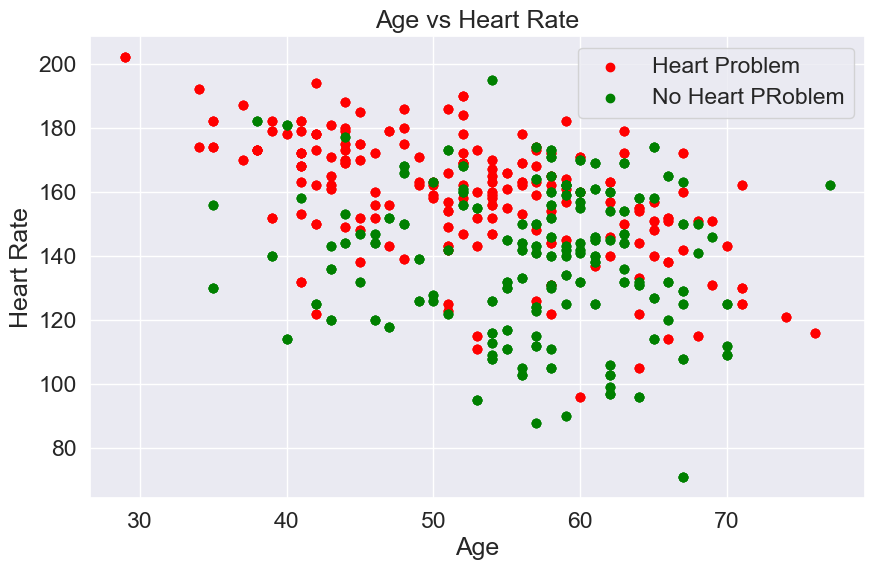

In [130]:
# finding paterns in data using scater plot
plt.figure(figsize=(10,6))
# create scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c="red")  # [df.target==1] means those who have heart disease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c="green")  # [df.target==0] means those who have not heart disease
plt.title("Age vs Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Heart Problem","No Heart PRoblem"]);

<Axes: ylabel='Frequency'>

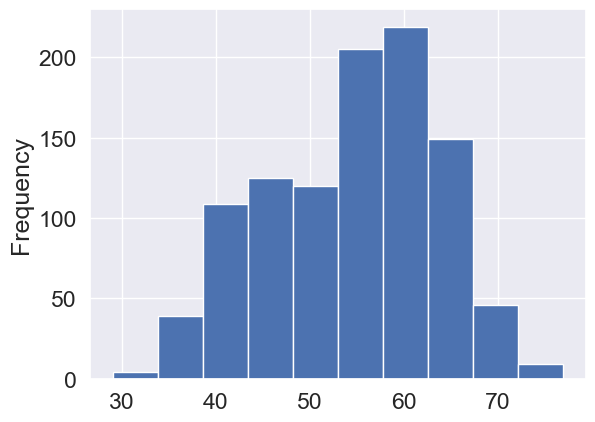

In [131]:
# Create Histogram for age distribution
df.age.plot.hist()

### Chest Pain (CP) Column

In [132]:
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

 #### cp: chest pain type
        Value 0: typical angina-- Actual Chest Pain: Chest pain due to decreased blood pressure
        Value 1: atypical angina -- Chest pain not related to the Heart Problem
        Value 2: non-anginal pain -- Not heart-related
        Value 3: asymptomatic -- Chest pain not showing heart problem

In [133]:
# relationship between Chest Pain (cp) and "target" columns
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

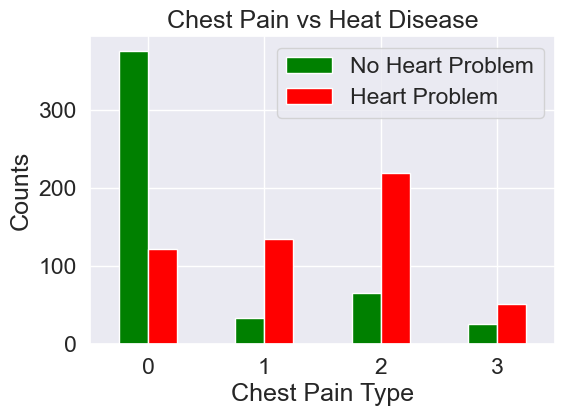

In [134]:
# Now Make a Bar plot of Chest Pain vs Target
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(6,4),
                                  color=["green","red"])
#Make some discription of the chart
plt.title("Chest Pain vs Heat Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Counts")
plt.legend(["No Heart Problem","Heart Problem"])
plt.xticks(rotation=0)

## Correlation Matrix

In [135]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


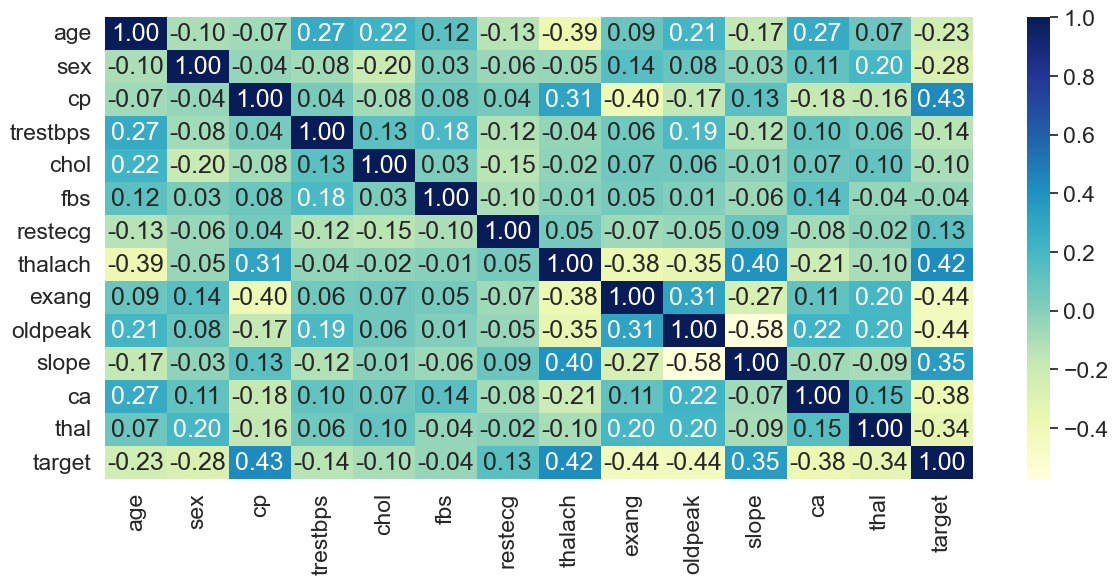

In [138]:
# lets draw correlation map
cor_map = df.corr()
home, room = plt.subplots(figsize=(14,6))
room = sns.heatmap(cor_map,
                   annot=True,
                   fmt="0.2f",
                   cmap="YlGnBu")                         

In [139]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Modelling

In [140]:
# split the data into test and train data
x = df.drop("target", axis=1)
y = df["target"]

In [141]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [142]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [143]:
# using Random Seed, so that others could produce the same result
np.random.seed(7)
# split the data into test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [144]:
len(x)

1025

In [145]:
len(x_train)

820

In [146]:
len(x_test)

205

In [147]:
len(y)

1025

In [148]:
len(y_train)

820

In [149]:
len(y_test)

205

### The model we are going to use
> 1. K-Nearest Nighbors Classifier
> 2. Random Forest Classifier
> 3. Logistic Regression

In [150]:
# Putting the models in dictionary are the best
models = {"KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Logistic Regression":LogisticRegression()}
#Create the function to evaluate the models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    # make a dictionary to score the model
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        # Evlauate the model and appent its score
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [151]:
model_score = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_score
                            

C:\Users\ii\OneDrive\Desktop\ml_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7463414634146341,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8780487804878049}

<Axes: >

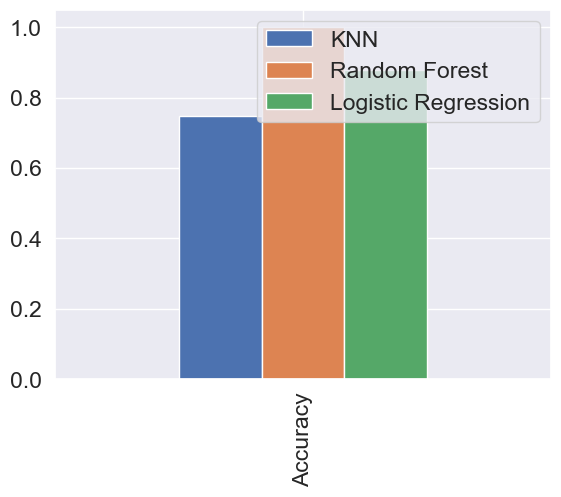

In [152]:
model_compare = pd.DataFrame(model_score,index=["Accuracy"])
model_compare.plot.bar()

# Improving and Tunning the madel
## Universal methods used for all Classification problems
> 1. Hyper Parameter Tunning
> 2. Features Improving
>
## Advance level
> 1. Confusion Matrix
> 2. Crosss_Validation
> 3. Precision
> 4. Recall
> 5. F1
> 6. Classification Report
> 7. ROC Curve

In [153]:
#
train_score = []
test_score = []
# create range to be test for n_neighbors
nneighbours = range(1,30)
# KNN Instance
KNN = KNeighborsClassifier()
# Looping though the range
for i in nneighbours:
    KNN.set_params(n_neighbors=i)
    # Run the fit for ith vlue
    KNN.fit(x_train,y_train)
    # Update the Training Score
    train_score.append(KNN.score(x_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(x_test,y_test))


## Plot the Accuracy Score

Max KNN Score:98.05%


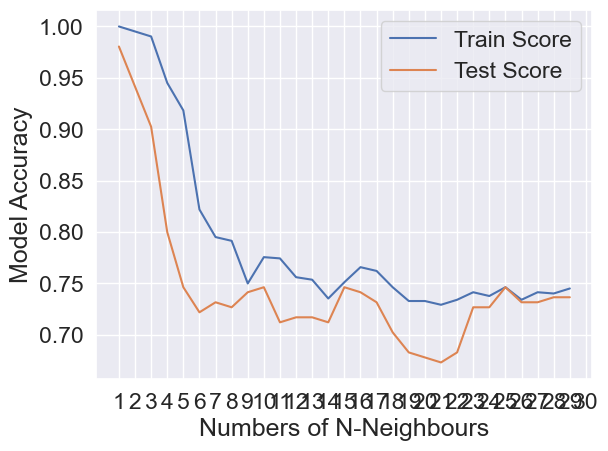

In [154]:
plt.plot(nneighbours,train_score, label="Train Score")
plt.plot(nneighbours,test_score, label="Test Score")
plt.xticks(np.arange(1,31,1))
plt.xlabel("Numbers of N-Neighbours")
plt.ylabel("Model Accuracy")
plt.legend()
print(f"Max KNN Score:{max(test_score)*100:0.2f}%")

## Hyperparameter tunning using Randomize Search CV
> 1. LogisticRegression()
> 2. RandomForestClassifier()

In [155]:
LR_hp = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

In [156]:
LR_hp = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}
RFC_hp ={
    "n_estimators":np.arange(10,1600,100),
    "max_depth":[None,3,5,6,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
}

In [157]:
# Tune Logistic Regression
np.random.seed(7)
# Lets use RSCV to tune HP

lr = RandomizedSearchCV(LogisticRegression(),
                        param_distributions=LR_hp,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# Fit the random HP search model for LR
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [161]:
# Now to check the score
lr.score(x_test,y_test)

0.8682926829268293

In [162]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [163]:
# Tune Random Forest Classifier
np.random.seed(7)
# Lets use RSCV to tune HP

rfc = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=RFC_hp,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# Fit the random HP search model for RFC
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [164]:
rfc.score(x_test,y_test)

0.9317073170731708

In [165]:
rfc.best_params_

{'n_estimators': 910,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 6}

## Hyper Parameter tunning using GridSearch CV

In [166]:
# Tune Logistic Regression using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP

lr_gs = GridSearchCV(LogisticRegression(),
                        param_grid=LR_hp,
                        cv=5,
                        verbose=True)
# Fit the random HP search model for LR
lr_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [167]:
lr_gs.score(x_test,y_test)

0.8682926829268293

In [193]:
lr_gs.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [194]:
# Tune Random Forest Classifier using GSCV
np.random.seed(7)
# Lets use RSCV to tune HP
RFC2_hp ={
    "n_estimators":np.arange(1,100,50),
    "max_depth":[None,3,50],
    "min_samples_split":np.arange(2,6,2),
    "min_samples_leaf":np.arange(1,5,2),
}
rfc_gs = GridSearchCV(RandomForestClassifier(n_jobs=1),
                        param_grid=RFC2_hp,
                        cv=5,
                        verbose=True)
# Fit the random HP search model for LR
rfc_gs.fit(x_train,y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [195]:
rfc_gs.score(x_test,y_test)

1.0

In [196]:
rfc_gs.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 51}

* 'KNN': 0.7463414634146341, After Improving = 98*  'Random Forest':0.93170731707317080  After Improving = 0.9902439024390244,
*  'Logistic Regression'0.8682926829268293, After Improving = 0.86829268292682939}

## Improving and Tunning the Model

In [189]:
# Plotting the area under the curve
# from sklearn.metrics import plot_roc_curve
y_predicts = lr_gs.predict(x_test)
plot_roc_curve(lr_gs,x_test,y_test)

NameError: name 'plot_roc_curve' is not defined

In [173]:
# Confusion Matrix
print(confusion_matrix(y_test,y_predicts))

[[ 75  14]
 [ 13 103]]


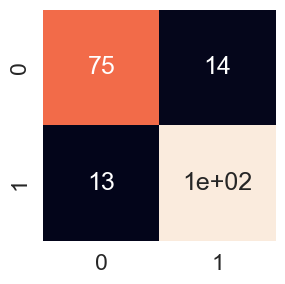

In [174]:
sns.set(font_scale=1.5)

def plot_confusion(y_test,y_predicts):
    "This is plot the confusion matrix"

    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_predicts),
                     annot=True,
                     cbar=False)
plot_confusion(y_test,y_predicts)
    

## Lets Plot the Classification Report

In [175]:
print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        89
           1       0.88      0.89      0.88       116

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [176]:
lr_gs.best_params_
lr = LogisticRegression(C=0.23357214690901212,
                        solver = 'liblinear')
                        

In [177]:
# Cross validation Accuracy

cv_accuracy = cross_val_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8438702291092562

In [178]:
# Cross Validation
cross_val_scrore()

NameError: name 'cross_val_scrore' is not defined

In [179]:
# Cross validation Precision

cv_precision = cross_val_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8105313315767159

In [180]:
# Cross validation Recall

cv_recall = cross_val_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9087218045112782

In [181]:
# Cross validation F1-Score

cv_f1 = cross_val_score(lr,
                              x,
                              y,
                              cv=7,
                              scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8564907540515759

## Visulalizing the Cross Validated Matrices

<Axes: title={'center': 'Comparison of the Matrices'}>

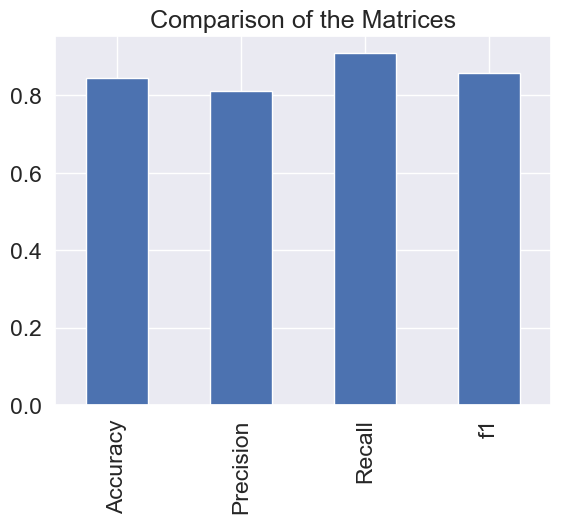

In [182]:
cv_plot = pd.DataFrame({
    "Accuracy" :cv_accuracy,
    "Precision" :cv_precision,
    "Recall" :cv_recall,
    "f1" :cv_f1
},index=[0])
cv_plot.T.plot.bar(title="Comparison of the Matrices",
                 legend=False)

## Features Improving 

In [184]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [185]:
# Check Coeffecient
lr.fit(x_train,y_train)
lr.coef_

array([[ 0.00343633, -1.53465992,  0.76772602, -0.01324319, -0.00463393,
        -0.25892336,  0.34158906,  0.03160528, -0.82371075, -0.45637064,
         0.50388391, -0.67012401, -0.72960302]])

In [186]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': 0.003436332962151198,
 'sex': -1.534659920564627,
 'cp': 0.7677260208990845,
 'trestbps': -0.013243187849024387,
 'chol': -0.0046339301592866824,
 'fbs': -0.2589233649680731,
 'restecg': 0.34158905698865266,
 'thalach': 0.03160528146353403,
 'exang': -0.8237107540851054,
 'oldpeak': -0.45637063949286333,
 'slope': 0.5038839105601659,
 'ca': -0.6701240101681486,
 'thal': -0.7296030153275627}

<Axes: title={'center': 'Features Importance'}>

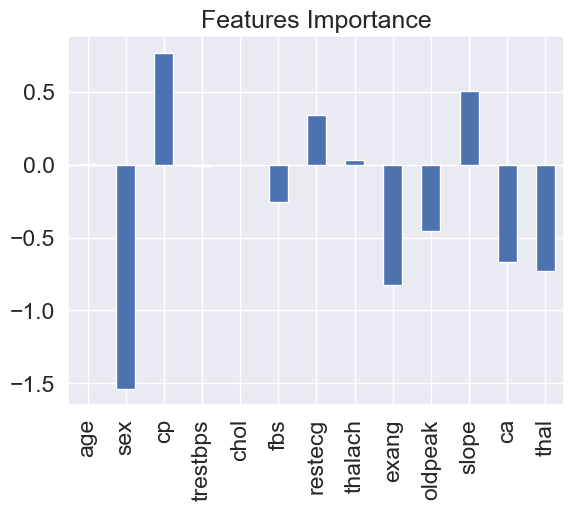

In [187]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="Features Importance", legend=False)

### Difirence Between Corelation Matix VS Coefficient Matrix
> 1. Corelation Matrix: Compares each feature against each feature (VS all)
> 2. Coefficient Marix: Compares each feature against the target (VS target)


## Conclusion

### We set 95% accuracy goal, if, we did not meet
#### We can ask some Question
* what if we try to get more data
* what if we try to improve the quality of the data
* what if we try to use other models and see if there is any improvements